In [1252]:
#Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import pprint
from sklearn.linear_model import LinearRegression

# Loading and Preprocessing Data

In [1152]:
# Load data
file_path = Path("../resources/NFWBS_PUF_2016_data.csv")
df = pd.read_csv(file_path)

In [1153]:
# Store columns for each scale in a variable
fwb_cols = ['FWBscore', 'FWB1_1', 'FWB1_2', 'FWB1_3', 'FWB1_4', 'FWB1_5', 'FWB1_6',
            'FWB2_1', 'FWB2_2', 'FWB2_3', 'FWB2_4']
fs_cols = ['FSscore', 'FS1_1', 'FS1_2', 'FS1_3', 'FS1_4', 'FS1_5', 'FS1_6', 'FS1_7',
            'FS2_1', 'FS2_2', 'FS2_3']
lm_cols = ['LMscore', 'FINKNOWL1', 'FINKNOWL2', 'FINKNOWL3',
           'FK1correct', 'FK2correct', 'FK3correct']
kh_cols = ['KHscore', 'KHKNOWL1', 'KHKNOWL2','KHKNOWL3','KHKNOWL4','KHKNOWL5',
           'KHKNOWL6','KHKNOWL7','KHKNOWL8','KHKNOWL9', 'KH1correct', 'KH2correct',
           'KH3correct', 'KH4correct', 'KH5correct', 'KH6correct', 'KH7correct',
           'KH8correct', 'KH9correct']

In [1154]:
#create list of survey questions that weren't asked to all respondents and columns that had nonsubstantive value codes (ie. 98 and 99)
base = ['VALUERANGES', 'MORTGAGE','PAIDHELP','SOCSEC1','SOCSEC2','SOCSEC3','LIFEEXPECT','RETIRE','PCTLT200FPL','HOUSERANGES','SAVINGSRANGES']

# drop columns from using the list above
df = df.copy()
df.drop(columns=base, inplace=True)
df.head()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,3,1,4,8,0,0,0,0,1,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,3,1,2,3,0,0,0,0,2,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,3,1,4,9,0,0,0,1,2,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,3,1,3,7,0,0,0,0,1,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,1,2,4,0,0,1,0,4,4.260668


In [1159]:
# Create dataframe just for Financial Well-Being (FWB) responses, scores and the finalwt
fwb_df = pd.concat([df[fwb_cols], df[['finalwt']]], axis=1)

In [1161]:
# Calculate the weighted score
fwb_df['wt_score_df'] = data_df['FWBscore']*data_df['finalwt']
fwb_df.head()

,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,finalwt,wt_score_df
0,55,3,3,3,3,2,3,2,3,2,4,0.367292,20.201053
1,51,2,2,3,3,3,4,2,2,2,3,1.327561,67.705596
2,49,3,3,3,3,3,3,3,3,3,3,0.835156,40.922635
3,49,3,3,3,3,3,3,3,3,3,3,1.410871,69.132679
4,49,3,3,3,3,3,3,3,3,3,3,4.260668,208.772739


In [1163]:
# display summary statistics
fwb_df.describe()

,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,finalwt,wt_score_df
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,56.034094,3.048014,3.191899,2.531279,3.285737,2.771505,3.071942,2.335940,3.388176,2.029246,2.687989,1.000000,54.202316
std,14.154676,1.235221,1.114130,1.196235,1.052283,1.269624,1.177299,1.178593,1.267983,1.105532,1.135752,0.585406,32.287129
min,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,0.165567,-5.015855
25%,48.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,1.000000,3.000000,1.000000,2.000000,0.600582,32.990588
50%,56.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,0.845213,46.171876
75%,65.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,1.251415,66.921936
max,95.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.638674,411.597797


# Linear Regression (model_lr, X = FWB responses, y = FWBscore) 

In [1164]:
# Define features set
X = fwb_df.copy()
X.drop(columns=['FWBscore','finalwt','wt_score_df'], axis=1, inplace=True)
X.head()

,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4
0,3,3,3,3,2,3,2,3,2,4
1,2,2,3,3,3,4,2,2,2,3
2,3,3,3,3,3,3,3,3,3,3
3,3,3,3,3,3,3,3,3,3,3
4,3,3,3,3,3,3,3,3,3,3


In [1165]:
# Create an array for the dependent variable y
y = data_df['FWBscore'].values.reshape(-1, 1)
y[:5]

array([[55],
       [51],
       [49],
       [49],
       [49]], dtype=int64)

### Building the Linear Regression Model

In [1167]:
# Create a model with scikit-learn
model_lr = LinearRegression()

In [1168]:
# Fit the data into the model
model_lr.fit(X, y)

LinearRegression()

In [1169]:
# Display the slope
print(f"Model's slope: {model_lr.coef_}")

Model's slope: [[ 0.84329595  0.82262305 -2.0189136   1.2688397  -1.33365171 -1.60626036
  -2.5349672   1.28308009 -1.79639979 -1.86589867]]


In [1170]:
# Display the y-intercept
print(f"Model's y-intercept: {model_lr.intercept_}")

Model's y-intercept: [70.64499112]


In [1171]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model_lr.intercept_} + {model_lr.coef_[0]}X")

Model's formula: y = [70.64499112] + [ 0.84329595  0.82262305 -2.0189136   1.2688397  -1.33365171 -1.60626036
 -2.5349672   1.28308009 -1.79639979 -1.86589867]X


In [1172]:
# Make predictions using the X set
predicted_y_values = model_lr.predict(X)

In [1173]:
# Create a copy of the original data
predicted_df = fwb_df.copy()

# Add a column with the predicted salary values
predicted_df["predicted_FWBscore"] = predicted_y_values

# Display sample data
predicted_df.head()

,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,finalwt,wt_score_df,predicted_FWBscore
0,55,3,3,3,3,2,3,2,3,2,4,0.367292,20.201053,53.629354
1,51,2,2,3,3,3,4,2,2,2,3,1.327561,67.705596,49.606341
2,49,3,3,3,3,3,3,3,3,3,3,0.835156,40.922635,49.830234
3,49,3,3,3,3,3,3,3,3,3,3,1.410871,69.132679,49.830234
4,49,3,3,3,3,3,3,3,3,3,3,4.260668,208.772739,49.830234


### Linear Regression Model Assessment

In [1112]:
# Import relevant metrics from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

In [1113]:
# Compute metrics for the linear regression model: score, r2, mse, rmse, std
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.9253742601327382.
The r2 is 0.9253742601327382.
The mean squared error is 14.949290665540028.
The root mean squared error is 3.86643125705605.
The standard deviation is 14.15356905358079.


# Decision Tree (model_dt, X2 = df less score scale columns, y2 = FWBquantile) 

In [1175]:
# Import decision tree modules
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

In [1177]:
# Create FWBscore quantiles
df['FWBquantile'] = pd.qcut(df['FWBscore'], q=[0, .25, .5, .75, 1.], labels=['bad','avg','good','excellent'])
df.head()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,finalwt,FWBquantile
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0.367292,avg
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,1.327561,avg
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,0.835156,avg
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,1.410871,avg
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,4.260668,avg


In [1312]:
# Define features set (X2)
X2 = df.copy()
columns_to_drop = fwb_cols + fs_cols + lm_cols + kh_cols + ['PUF_ID', 'finalwt', 'FWBquantile']
X2.drop(columns=columns_to_drop, inplace=True)
X2.head()

,sample,fpl,SWB_1,SWB_2,SWB_3,SUBKNOWL1,ACT1_1,ACT1_2,FINGOALS,PROPPLAN_1,...,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV
0,2,3,5,5,6,5,4,3,1,5,...,7,3,1,4,8,0,0,0,0,1
1,1,3,6,6,6,5,4,3,0,3,...,6,3,1,2,3,0,0,0,0,2
2,1,3,4,3,4,5,3,3,1,4,...,6,3,1,4,9,0,0,0,1,2
3,1,3,6,6,6,-1,-1,-1,-1,3,...,8,3,1,3,7,0,0,0,0,1
4,1,3,4,4,4,4,3,3,1,3,...,7,1,1,2,4,0,0,1,0,4


In [1283]:
# Define target vector (y2)
y2 = df['FWBquantile'].ravel()
y2[:5]

['avg', 'avg', 'avg', 'avg', 'avg']
Categories (4, object): ['bad' < 'avg' < 'good' < 'excellent']

In [1181]:
# Splitting into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=42)

### Use RandomizedSearchCV to determine best set of hyperparameters

In [1203]:
parameters = {'max_depth' : (3,5,7,9,10,20,50),
              'criterion' : ('gini', 'entropy'),
              'max_features' : ('sqrt', 'log2'),
              'min_samples_split' : (2,4,6,10,20)
             }

In [1204]:
# Create the decision tree classifier instance
model_dt = RandomizedSearchCV(DecisionTreeClassifier(),param_distributions = parameters, cv = 20, verbose = True)

In [1205]:
# Fitting the model
model_dt = model_dt.fit(X_train, y_train)

Fitting 20 folds for each of 10 candidates, totalling 200 fits


In [1206]:
model_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=6)

In [1207]:
# Create the decision tree classifier instance
# model_dt = tree.DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=4)

### Make predictions

In [1208]:
# Making predictions using the testing data
y2_pred = model_dt.predict(X_test)

In [1210]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y2_pred))

Accuracy: 0.49530956848030017


In [1128]:
#tree.plot_tree(model, max_depth=3, fontsize=5)

## Random Forest (model_rf, X_rf = df less score scale columns, y2 = FWBquantile)

In [1276]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.inspection import permutation_importance
from sklearn import tree
from sklearn.datasets import load_iris
%matplotlib inline

In [1277]:
# Define features set (X_rf)
X_rf = df.copy()
columns_to_drop = fwb_cols + fs_cols + lm_cols + kh_cols + ['PUF_ID', 'finalwt', 'FWBquantile']
X_rf.drop(columns=columns_to_drop, inplace=True)

In [1313]:
# Saving feature names for later use
feature_list = list(X_rf.columns)
feature_list

['sample',
 'fpl',
 'SWB_1',
 'SWB_2',
 'SWB_3',
 'SUBKNOWL1',
 'ACT1_1',
 'ACT1_2',
 'FINGOALS',
 'PROPPLAN_1',
 'PROPPLAN_2',
 'PROPPLAN_3',
 'PROPPLAN_4',
 'MANAGE1_1',
 'MANAGE1_2',
 'MANAGE1_3',
 'MANAGE1_4',
 'SAVEHABIT',
 'FRUGALITY',
 'AUTOMATED_1',
 'AUTOMATED_2',
 'ASK1_1',
 'ASK1_2',
 'SUBNUMERACY2',
 'SUBNUMERACY1',
 'CHANGEABLE',
 'GOALCONF',
 'ENDSMEET',
 'HOUSING',
 'LIVINGARRANGEMENT',
 'IMPUTATION_FLAG',
 'PRODHAVE_1',
 'PRODHAVE_2',
 'PRODHAVE_3',
 'PRODHAVE_4',
 'PRODHAVE_5',
 'PRODHAVE_6',
 'PRODHAVE_7',
 'PRODHAVE_8',
 'PRODHAVE_9',
 'PRODUSE_1',
 'PRODUSE_2',
 'PRODUSE_3',
 'PRODUSE_4',
 'PRODUSE_5',
 'PRODUSE_6',
 'CONSPROTECT1',
 'CONSPROTECT2',
 'CONSPROTECT3',
 'EARNERS',
 'VOLATILITY',
 'SNAP',
 'MATHARDSHIP_1',
 'MATHARDSHIP_2',
 'MATHARDSHIP_3',
 'MATHARDSHIP_4',
 'MATHARDSHIP_5',
 'MATHARDSHIP_6',
 'COLLECT',
 'REJECTED_1',
 'REJECTED_2',
 'ABSORBSHOCK',
 'BENEFITS_1',
 'BENEFITS_2',
 'BENEFITS_3',
 'BENEFITS_4',
 'BENEFITS_5',
 'FRAUD2',
 'COVERCOSTS',
 '

In [1284]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_rf, y2, random_state=78)

### RandomizedsearchCV for RF

In [1320]:
from pprint import pprint

In [1289]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
parameters = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [1292]:
# Create the RF classifier instance
model_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions = parameters, cv = 5, verbose = True)

In [1293]:
# Fitting the model
model_rf = model_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [1294]:
model_rf.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=40, min_samples_leaf=4,
                       n_estimators=1400)

### Make Predictions Using the RF Model

In [1295]:
# Making predictions using the testing data
predictions = model_rf.predict(X_test)

### RF Model Evaluation

In [1296]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual bad", "Actual avg", "Actual good", "Actual excellent"], 
    columns=["Predicted bad", "Predicted avg", "Predicted good", "Predicted excellent"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [1297]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted bad,Predicted avg,Predicted good,Predicted excellent
Actual bad,174,92,17,118
Actual avg,67,337,5,16
Actual good,16,2,238,99
Actual excellent,71,20,116,211


Accuracy Score : 0.600375234521576
Classification Report
              precision    recall  f1-score   support

         avg       0.53      0.43      0.48       401
         bad       0.75      0.79      0.77       425
   excellent       0.63      0.67      0.65       355
        good       0.48      0.50      0.49       418

    accuracy                           0.60      1599
   macro avg       0.60      0.60      0.60      1599
weighted avg       0.60      0.60      0.60      1599



### Features Importances

In [1302]:
# Create a random forest classifier
model_rf_importance = RandomForestClassifier(bootstrap=False, max_depth=40, min_samples_leaf=4,
                       n_estimators=1400)

In [1303]:
#Fit the model
model_rf_importance = model_rf_importance.fit(X_train, y_train)

In [1304]:
# Making predictions using the testing data
predictions = model_rf_importance.predict(X_test)

[Text(0.49051339285714285, 0.9285714285714286, 'fpl <= 2.5\ngini = 0.749\nsamples = 4795\nvalue = [1166, 1283, 1124, 1222]'),
 Text(0.26674107142857145, 0.7857142857142857, 'REJECTED_2 <= 0.5\ngini = 0.642\nsamples = 1144\nvalue = [306, 582, 88, 168]'),
 Text(0.14285714285714285, 0.6428571428571429, 'SAVEHABIT <= 3.5\ngini = 0.69\nsamples = 865\nvalue = [255, 367, 86, 157]'),
 Text(0.07142857142857142, 0.5, 'MATHARDSHIP_5 <= 1.5\ngini = 0.542\nsamples = 321\nvalue = [75, 201, 13, 32]'),
 Text(0.03571428571428571, 0.35714285714285715, 'ASK1_2 <= 2.5\ngini = 0.603\nsamples = 236\nvalue = [65, 130, 12, 29]'),
 Text(0.017857142857142856, 0.21428571428571427, 'SHOCKS_4 <= 0.5\ngini = 0.611\nsamples = 133\nvalue = [30, 74, 8, 21]'),
 Text(0.008928571428571428, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.026785714285714284, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.05357142857142857, 0.21428571428571427, 'ENDSMEET <= 1.5\ngini = 0.581\nsamples = 103\nvalue = [35, 56, 4, 8]'),
 Text(0.

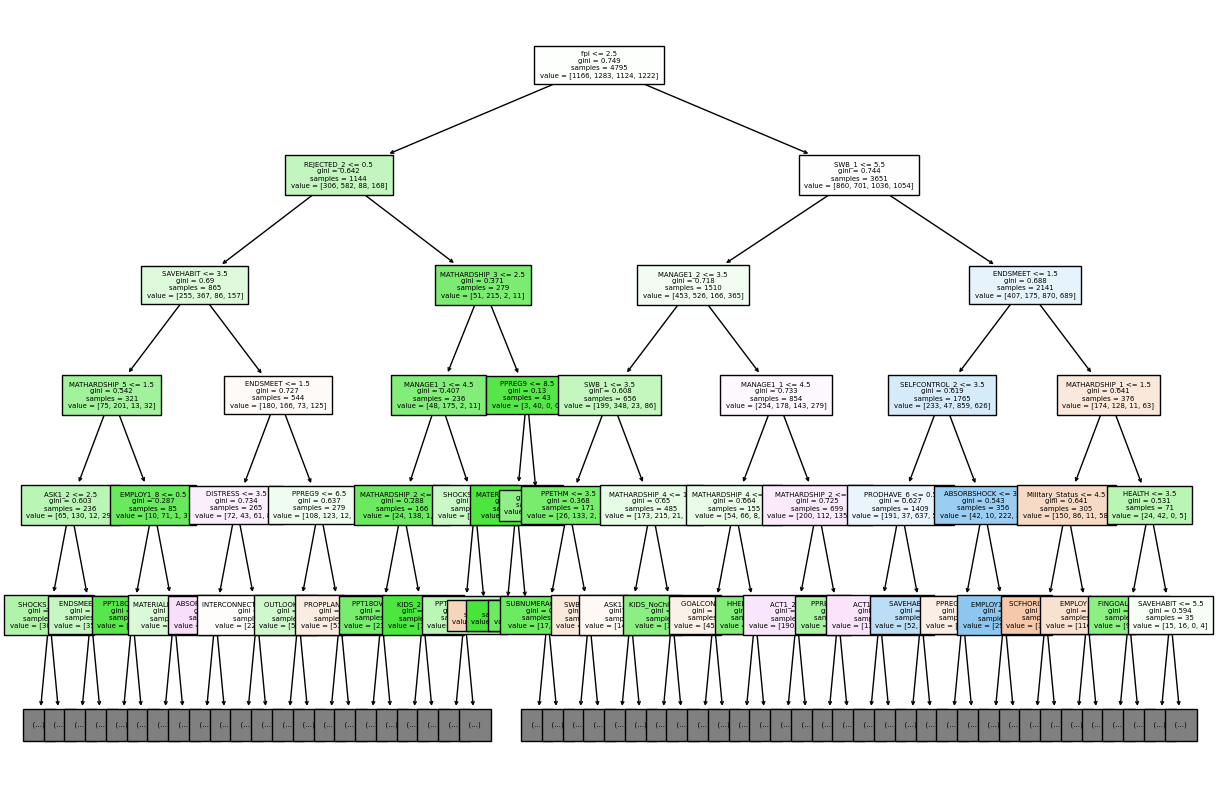

In [1314]:
#view the tree
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(model_rf_importance[2], max_depth=5, fontsize=5,filled=True,feature_names = feature_list)

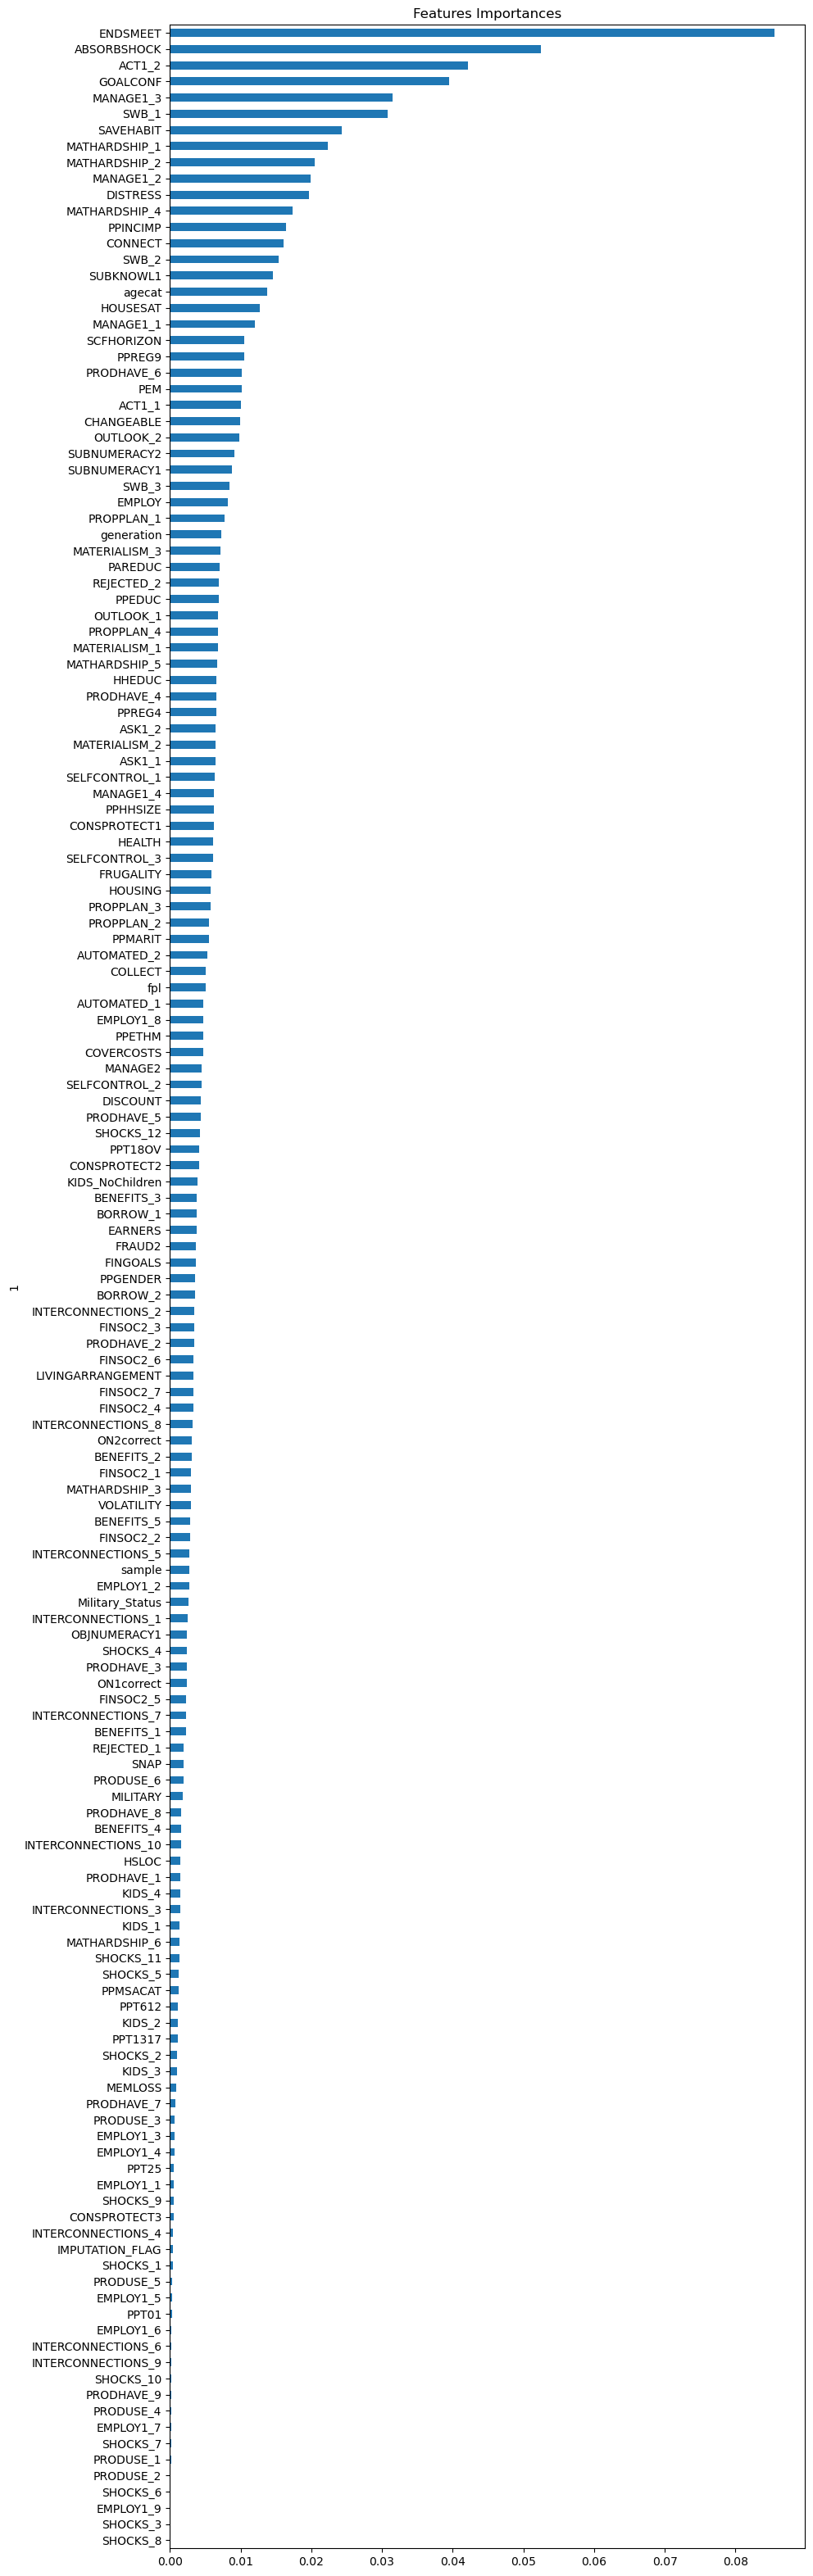

In [1306]:
importances_df = pd.DataFrame(sorted(zip(model_rf_importance.feature_importances_, X_rf.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
ax = importances_sorted.plot(kind='barh', title='Features Importances', legend=False, figsize=(10, 40))

# Linear Regression (model_lr2, X_rf = df less score scale columns, y = FWBscore)

In [1315]:
model_lr2 = LinearRegression()

In [1316]:
model_lr2.fit(X_rf,y)

LinearRegression()

In [1317]:
predicted_y_values = model_lr2.predict(X_rf)

In [1318]:
predicted_df = X_rf.copy()

# Add a column with the predicted salary values
predicted_df["predicted_FWBscore"] = predicted_y_values

# Display sample data
predicted_df

,sample,fpl,SWB_1,SWB_2,SWB_3,SUBKNOWL1,ACT1_1,ACT1_2,FINGOALS,PROPPLAN_1,...,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,predicted_FWBscore
0,2,3,5,5,6,5,4,3,1,5,...,3,1,4,8,0,0,0,0,1,51.129360
1,1,3,6,6,6,5,4,3,0,3,...,3,1,2,3,0,0,0,0,2,49.590682
2,1,3,4,3,4,5,3,3,1,4,...,3,1,4,9,0,0,0,1,2,52.676344
3,1,3,6,6,6,-1,-1,-1,-1,3,...,3,1,3,7,0,0,0,0,1,47.479568
4,1,3,4,4,4,4,3,3,1,3,...,1,1,2,4,0,0,1,0,4,45.894472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,3,3,6,7,7,5,5,4,1,3,...,1,1,2,3,0,0,0,1,2,59.402412
6390,3,2,7,7,7,6,4,4,1,4,...,1,1,3,6,0,0,0,0,3,63.975823
6391,1,3,5,6,6,4,4,4,1,5,...,1,1,1,2,0,0,0,0,2,58.462413
6392,1,3,5,5,5,6,3,4,0,3,...,5,1,4,9,0,0,0,0,2,51.164968


In [1319]:
# Compute metrics for the linear regression model: score, r2, mse, rmse, std
score = model_lr2.score(X_rf, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.6851787314100584.
The r2 is 0.6851787314100584.
The mean squared error is 63.06610373600802.
The root mean squared error is 7.9414169854005285.
The standard deviation is 14.15356905358079.
